In [1]:
#importing needed library
import pandas as pd
import numpy as np
#loading in dataset from excel
elastic_prop = pd.read_excel("elastic Hole A logs.xlsx")

In [2]:
#displaying loaded dataset
elastic_prop

,depth,Gamma,Density,vp,Vs,shear_modulus,poisson_ratio,young_modulus,real_labels_A,formations,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,161.02,45.0744,2.632998,5795.981453,3695.036335,3.594909e+07,0.157642,8.323239e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161.07,47.9752,2.648486,5783.318340,3701.418877,3.628559e+07,0.153086,8.368083e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161.12,49.2025,2.678836,5798.969072,3680.981595,3.629722e+07,0.162582,8.439702e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161.17,52.2893,2.632898,5769.230769,3671.970624,3.550033e+07,0.159522,8.232685e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161.22,59.3182,2.672184,5742.725881,3671.521234,3.602122e+07,0.154337,8.316123e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,815.57,59.7361,2.629264,5804.055100,3811.944091,3.820562e+07,0.120724,8.563593e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13080,815.62,58.4438,2.639210,5810.350170,3792.667509,3.796326e+07,0.128808,8.570644e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13081,815.67,61.1281,2.685878,5832.944470,3769.317753,3.816030e+07,0.141499,8.711986e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13082,815.72,68.6226,2.697876,5886.970173,3768.844221,3.832113e+07,0.152747,8.834917e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
features = ['Gamma', 'Density', 'vp', 'Vs', 'shear_modulus', 'poisson_ratio', 'young_modulus']

In [5]:
#extracting required columns of logs and assaising the values to variable x_features

features = ['Gamma', 'Density', 'vp', 'Vs']
x_featires = elastic_prop.loc[:, features].values

In [6]:
#log_features = elastic_prop.loc[:, features].values

In [7]:
#log_features

array([[4.50744000e+01, 2.63299800e+00, 5.79598145e+03, ...,
        3.59490945e+07, 1.57642429e-01, 8.32323942e+07],
       [4.79752000e+01, 2.64848600e+00, 5.78331834e+03, ...,
        3.62855870e+07, 1.53086325e-01, 8.36808282e+07],
       [4.92025000e+01, 2.67883600e+00, 5.79896907e+03, ...,
        3.62972246e+07, 1.62582323e-01, 8.43970234e+07],
       ...,
       [6.11281000e+01, 2.68587800e+00, 5.83294447e+03, ...,
        3.81603001e+07, 1.41498646e-01, 8.71198619e+07],
       [6.86226000e+01, 2.69787600e+00, 5.88697017e+03, ...,
        3.83211346e+07, 1.52747255e-01, 8.83491653e+07],
       [7.79380000e+01, 2.72520400e+00, 5.91575958e+03, ...,
        3.84191691e+07, 1.62709535e-01, 8.93406686e+07]])

In [8]:
#extracting columns of lithology log as labels
labels_y = elastic_prop.formations

In [9]:
labels_y

0        0
1        0
2        0
3        0
4        0
        ..
13079    6
13080    6
13081    6
13082    6
13083    6
Name: formations, Length: 13084, dtype: int64

In [10]:
#extracting values of encoded lithology classes
labels = labels_y.values

In [11]:
labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [12]:
#importing modules

from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [13]:
#importing modules

from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from kneed import KneeLocator
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [14]:
#Splitting logs and lithology into training and testing sets in ratio 80:20 % 
logs_train, logs_test, labels_train, labels_test = train_test_split(x_features, labels, test_size = 0.2, random_state = 0)

In [15]:
#standardizing training and testing datasets
scaler = StandardScaler()
logs_train_norm = scaler.fit_transform(logs_train)
logs_test_norm = scaler.transform(logs_test)

In [16]:
#importing modules
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from kneed import KneeLocator

In [17]:
#building a PCA modelfor selection of optimal number of components
prop_pca = PCA()
#prop_pca.fit(logs_train_norm)
logs_train_main_components = prop_pca.fit_transform(logs_train_norm)
logs_test_main_components = prop_pca.transform(logs_test_norm)

In [18]:
#exstimating eigenvalue for each principal component
#pca_classes = range(prop_pca.n_components_)
prop_pca.explained_variance_

array([2.5538634 , 1.01815241, 0.35085457, 0.07751181])

In [19]:
#estimating variance of principal component
prop_pca.explained_variance_ratio_

array([0.63840485, 0.25451378, 0.08770526, 0.0193761 ])

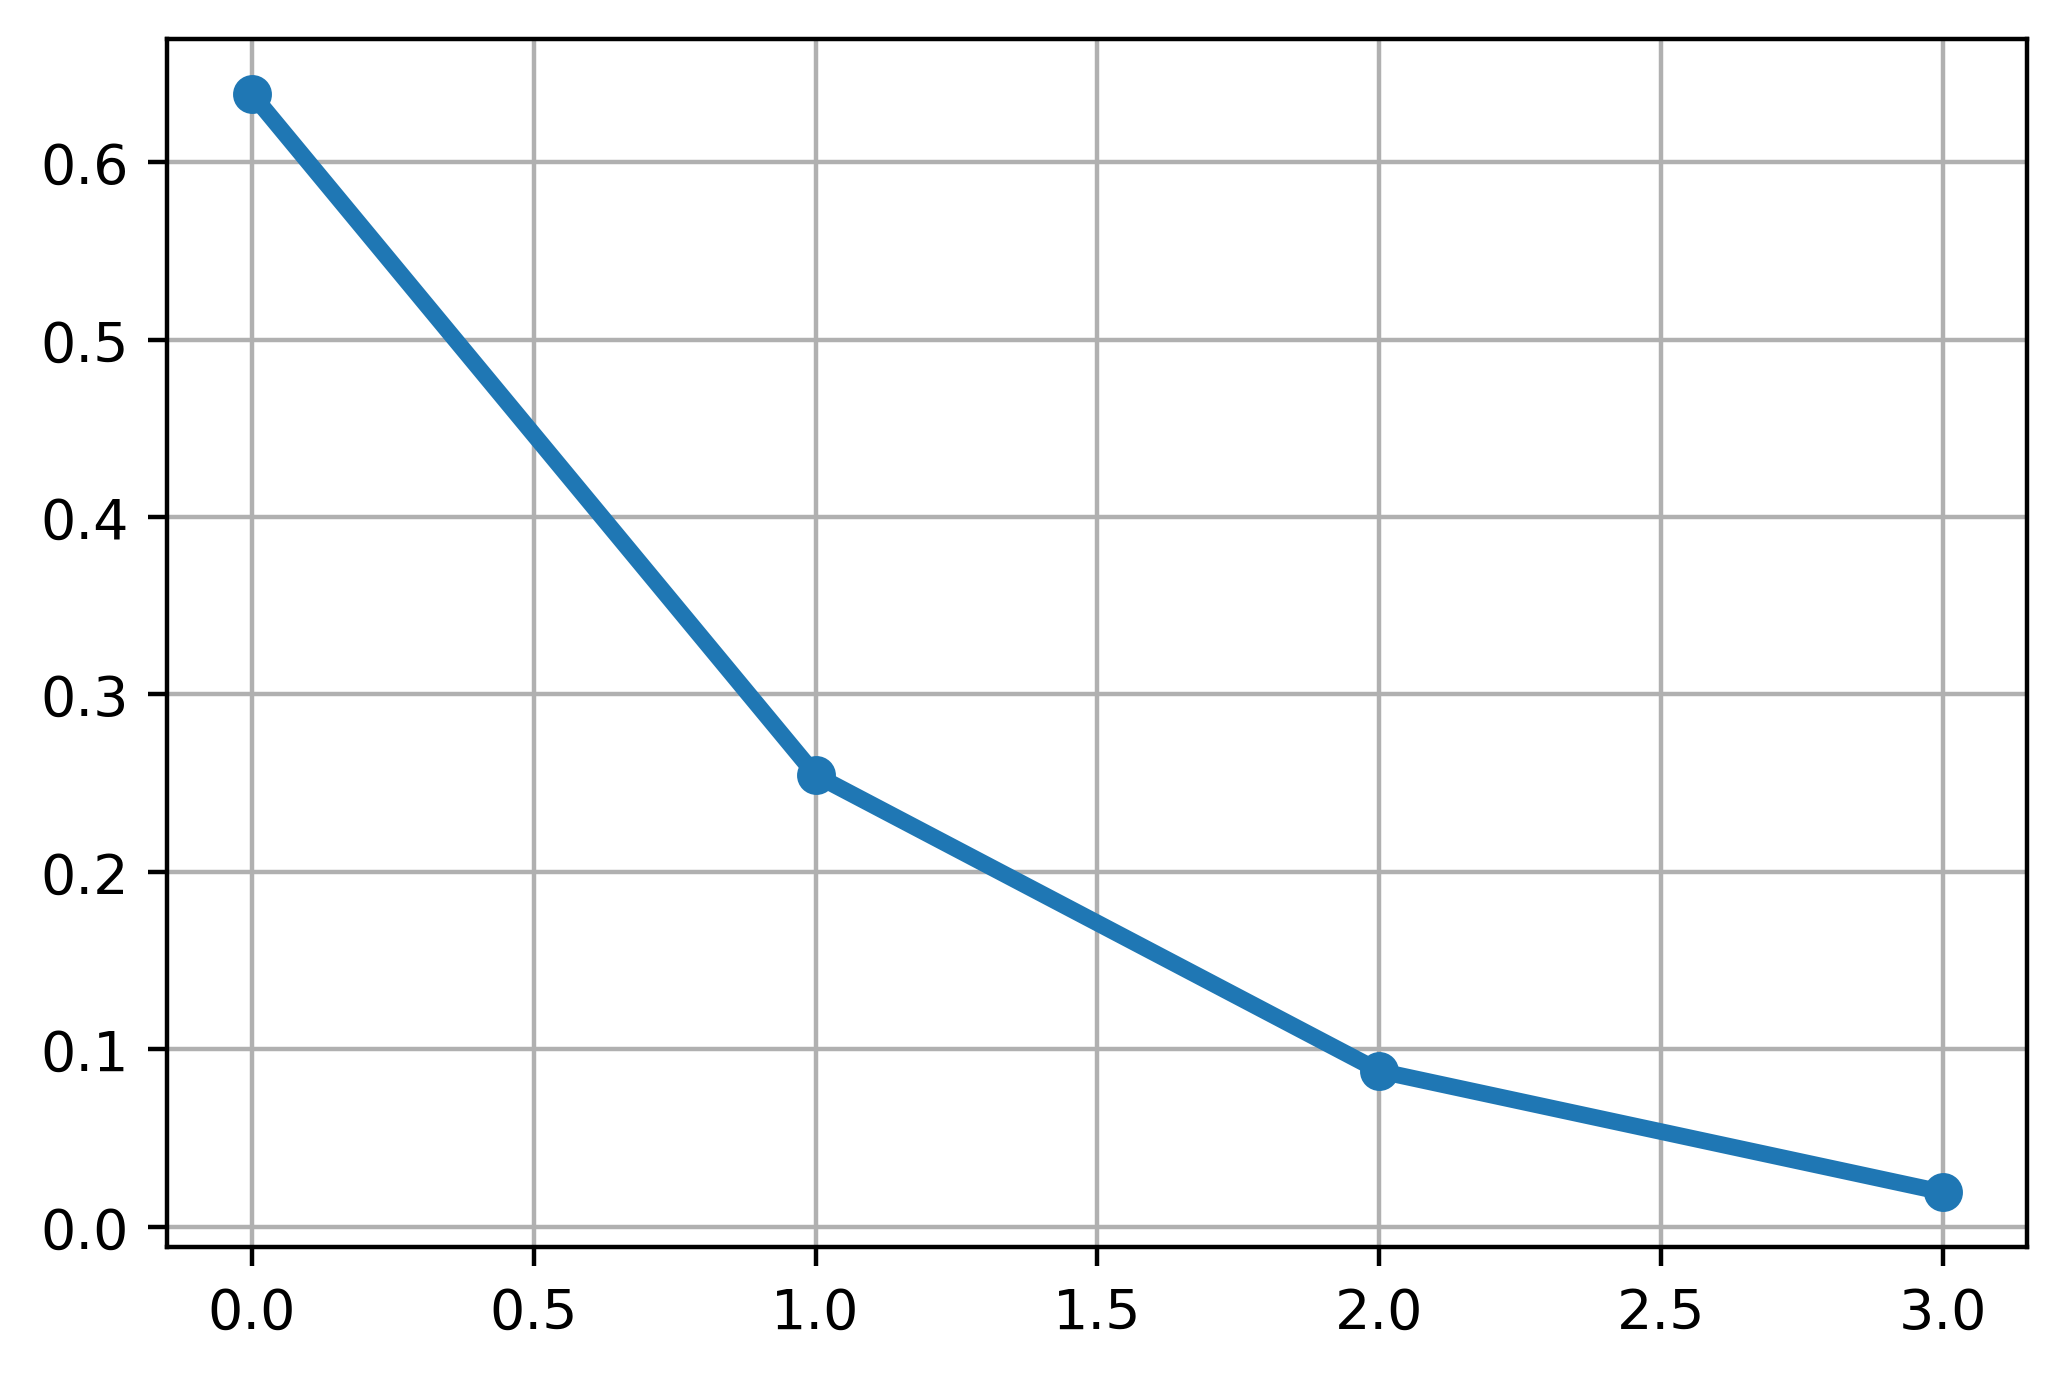

In [498]:

#pca_classes = range(prop_pca.n_components_)
#plt.figure(figsize = (6, 4), dpi = 400)
#plt.plot(pca_classes,prop_pca.explained_variance_ratio_,'-o', linewidth = 3)
#plt.xlabel('clusters, K', fontsize = 20)
#plt.ylabel('sum_squares', fontsize = 20)
#plt.xticks(range(1,8))
#plt.tick_params(direction = 'out', length = 4, width = 4, color = 'k')
#plt.tick_params(axis = 'both', which = 'major', labelsize = 16)
#plt.grid(True, which = 'major')
#plt.grid()
#plt.xlim(0, 5) 
#plt.savefig('desktop/PCA_ELBOW_PLOT_2.png', format = 'png', dpi = 400)
#plt.show()

In [20]:
#retraining the PCS model using 2 principal components
prop_pca = PCA(2)
#prop_pca.fit(logs_train_norm)
logs_train_main_components = prop_pca.fit_transform(logs_train_norm)
logs_test_main_components = prop_pca.transform(logs_test_norm)

In [21]:
#importing modules
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.pipeline import  Pipeline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [22]:
#importing random forest classifier model
from sklearn.ensemble import RandomForestClassifier

In [26]:
#defining the seed of randomness of random forest model
classifier_rf = RandomForestClassifier(random_state = 0)

In [27]:
#defining ranges of number of trees
param_range_n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

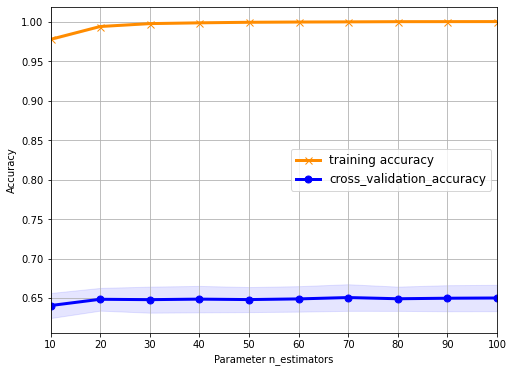

In [28]:
#estimating an appropriate range of values of number of trees
train_scores, test_scores = validation_curve(estimator = classifier_rf, X = logs_train_main_components, y = labels_train, param_name = 'n_estimators', param_range = param_range_n_estimators, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_n_estimators, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_n_estimators, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_n_estimators, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_n_estimators, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter n_estimators')
plt.ylabel('Accuracy')
#plt.xscale('log')
plt.xlim([10, 100])
plt.legend(loc = 'best', fontsize = 12)
#plt.savefig('desktop/RF_n_estimators_validatn_curve_pca.png', format = 'png', dpi = 400)
plt.show()

In [504]:
#defining range of values for maximum depth 
param_range_depth = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

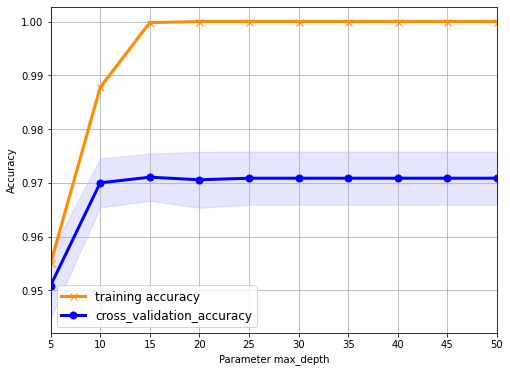

In [505]:
#estimating an appropriate range of values of maximum depth

train_scores, test_scores = validation_curve(estimator = classifier_rf, X = logs_train_main_components, y = labels_train, param_name = 'max_depth', param_range = param_range_depth, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_depth, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_depth, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_depth, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_depth, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter max_depth')
plt.ylabel('Accuracy')
plt.xlim([5, 50])
#plt.xscale('log')
plt.legend(loc = 'best', fontsize = 12)
#plt.savefig('desktop/RF_max_depth_validatn_curve_pca.png', format = 'png', dpi = 400)
plt.show()

In [299]:
#defining range of values for minimumsample split

param_range_min_samples_2 = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

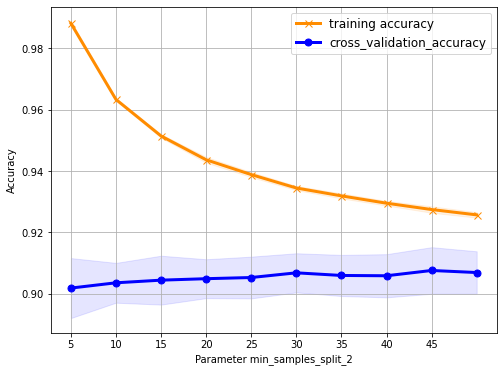

In [300]:
#estimating an appropriate range of values of minimum sample spplit

train_scores, test_scores = validation_curve(estimator = classifier_rf, X = logs_train_main_components, y = labels_train, param_name = 'min_samples_split', param_range = param_range_min_samples_2, cv = 10, n_jobs = -1)
train_scores_mean = np.mean(train_scores, axis = 1)
train_scores_std = np.std(train_scores, axis = 1)
test_scores_mean = np.mean(test_scores, axis = 1)
test_scores_std = np.std(test_scores, axis = 1)
figure(figsize = (8, 6))
plt.plot(param_range_min_samples_2, train_scores_mean, color = 'darkorange', marker = 'x', markersize = 7, label = 'training accuracy', linewidth = 3)
plt.fill_between(param_range_min_samples_2, train_scores_mean+train_scores_std, train_scores_mean-train_scores_std, alpha = 0.1, color = 'darkorange')
plt.plot(param_range_min_samples_2, test_scores_mean, color = 'blue', linestyle = '-', marker = 'o', markersize = 7, label = 'cross_validation_accuracy', linewidth = 3)
plt.fill_between(param_range_min_samples_2, test_scores_mean+test_scores_std, test_scores_mean-test_scores_std, alpha = 0.1, color = 'blue')
plt.grid()
#plt.xscale('log')
plt.xlabel('Parameter min_samples_split_2')
plt.ylabel('Accuracy')
#plt.xlim([5, 50])
plt.legend(loc = 'best', fontsize = 12)
plt.xticks(np.arange(5, 50, 5))
#plt.savefig('desktop/RF_min_samples_split_validatn_pca.png', format = 'png', dpi = 400)
plt.show()

In [35]:
#optimization and tuning of hyperparameters

grid_parameter = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'max_depth': [5,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], 'min_samples_split': [5, 6, 7, 8, 9, 10], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}
classifier_rf = RandomForestClassifier(random_state = 0)
grid_search = GridSearchCV(estimator = classifier_rf, param_grid = grid_parameter, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [36]:
#estimating time of optimization

import time
start = time.process_time()
grid_search = grid_search.fit(logs_train_main_components, labels_train)
end = time.process_time()
print(end-start)

121.21875


In [39]:
#estimating highest performance accuracy and parameter optimal value
svc_best_accuracy = grid_search.best_score_
svc_best_parameters = grid_search.best_params_

In [40]:
print('%.4f'%svc_best_accuracy)
print(svc_best_parameters)

0.6766
{'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 7, 'n_estimators': 70}


In [55]:
#applying optimized paratemers to RF Classifer
import time
start = time.process_time()
rf_classifier = RandomForestClassifier(n_estimators = 10, max_depth = 10, min_samples_split =7, max_features = 'auto', bootstrap = True, random_state = 0)
rf_classifier.fit(logs_train_main_components, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
scores_rf = cross_val_score(estimator = rf_classifier, X = logs_train_main_components, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

1.1875


In [56]:
#making predictions based on training dataset

labels_train_pred = rf_classifier.predict(logs_train_main_components)

In [57]:
#estimating accuracy of training 
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred))

Accuracy: 0.7299130600936276


In [58]:
#making predictions based on testing dataset

labels_test_pred = rf_classifier.predict(logs_test_main_components)

In [59]:
#estimating accuracy of testing
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred))

Accuracy: 0.6664119220481467


In [60]:
#estimating evaluation metrics based on predictions maded using training dataset

from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.6881    0.8093    0.7438      3361
           1     0.4720    0.2846    0.3551       889
           2     0.9266    0.8123    0.8657       762
           3     0.6115    0.5035    0.5523       572
           4     0.8070    0.8900    0.8465       700
           5     0.8410    0.9452    0.8901       621
           6     0.6521    0.5998    0.6249      2519
           7     0.9876    0.9962    0.9919      1043

    accuracy                         0.7299     10467
   macro avg     0.7482    0.7301    0.7338     10467
weighted avg     0.7211    0.7299    0.7208     10467



In [61]:
#estimating evaluation metrics based on predictions maded using testing dataset
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.6089    0.7328    0.6651       786
           1     0.3419    0.1852    0.2402       216
           2     0.8896    0.7569    0.8179       181
           3     0.5254    0.4460    0.4825       139
           4     0.7512    0.8191    0.7837       199
           5     0.7565    0.9012    0.8225       162
           6     0.5805    0.5291    0.5536       654
           7     0.9928    0.9786    0.9856       280

    accuracy                         0.6664      2617
   macro avg     0.6808    0.6686    0.6689      2617
weighted avg     0.6558    0.6664    0.6561      2617



In [418]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix # n_estimator 80
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [419]:
#cm = confusion_matrix(labels_test, labels_test_pred)
#cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

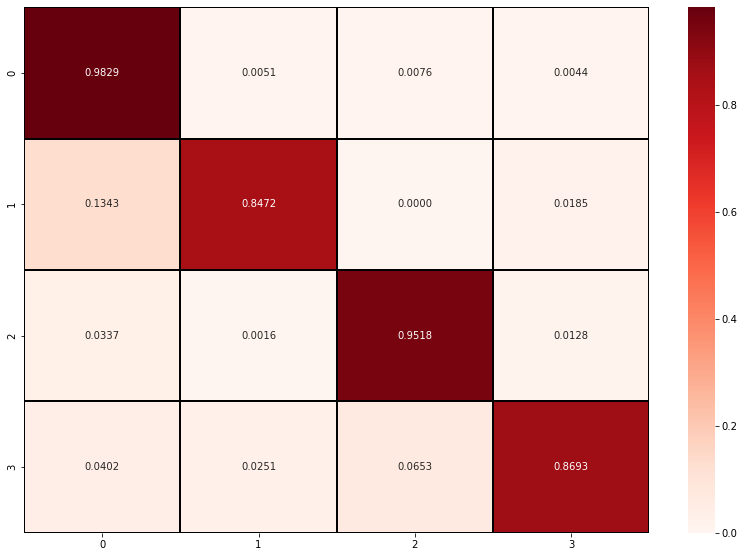

In [420]:
#plt.figure(figsize = (14, 10))
#sns.heatmap(cm_norm, annot = True, fmt = '.4f', linewidth = 2, linecolor = 'black', cmap = 'Reds')
#plt.subplots_adjust(bottom = 0.15)
#plt.set_xticks(tickmarks, minor = True)
#plt.grid(True, which = 'minor', linestyle = '-')
#plt.savefig('desktop/RF_matrix_pca.png', format = 'png', dpi = 400)

In [37]:
#apply pca components to gbdat model

import time
start = time.process_time()
gbt_classifier_2 =  GradientBoostingClassifier(n_estimators = 80, max_depth = 10, min_samples_split = 5, min_samples_leaf = 5, learning_rate = 0.1, random_state = 0)
gbt_classifier_2.fit(logs_train_main_components, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    #scores_3 = cross_val_score(estimator = classifier_score, X = x_train_norm, y = y_train, cv = 10)
    #add man of scores for n_estmators to n_score list
scores_rf = cross_val_score(estimator = gbt_classifier_2, X = logs_train_main_components, y = labels_train,  cv = 10)
end = time.process_time()
print(end-start)

114.828125


In [104]:
labels_train_pred_gbt = gbt_classifier_2.predict(logs_train_main_components)

In [105]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred_gbt))

Accuracy: 0.9455431355689309


In [106]:
labels_test_pred_gbt = gbt_classifier_2.predict(logs_test_main_components)

In [107]:
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred_gbt))

Accuracy: 0.6446312571646924


In [108]:
from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred_gbt, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.8942    0.9702    0.9307      3361
           1     0.9436    0.8841    0.9129       889
           2     1.0000    1.0000    1.0000       762
           3     0.9805    0.9685    0.9745       572
           4     0.9859    1.0000    0.9929       700
           5     1.0000    1.0000    1.0000       621
           6     0.9493    0.8615    0.9032      2519
           7     1.0000    1.0000    1.0000      1043

    accuracy                         0.9455     10467
   macro avg     0.9692    0.9605    0.9643     10467
weighted avg     0.9470    0.9455    0.9452     10467



In [109]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred_gbt, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.6019    0.7176    0.6547       786
           1     0.3041    0.2407    0.2687       216
           2     0.7907    0.7514    0.7705       181
           3     0.4697    0.4460    0.4576       139
           4     0.7440    0.7739    0.7586       199
           5     0.7459    0.8333    0.7872       162
           6     0.5761    0.4801    0.5238       654
           7     0.9926    0.9643    0.9783       280

    accuracy                         0.6446      2617
   macro avg     0.6531    0.6509    0.6499      2617
weighted avg     0.6384    0.6446    0.6384      2617



In [103]:
#applying pca components to SVM model
import time
start = time.process_time()
classifier = SVC(kernel= 'rbf', C = 1000, gamma = 8, random_state = 0)
classifier.fit(logs_train_main_components, labels_train)
scores = cross_val_score(estimator = classifier, X = logs_train_main_components, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

277.328125


In [114]:
labels_train_pred_svm = classifier.predict(logs_train_main_components)

In [115]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(labels_train, labels_train_pred_svm))

Accuracy: 0.7001050921945161


In [116]:
labels_test_pred_svm = classifier.predict(logs_test_main_components)

In [117]:
print("Accuracy:", metrics.accuracy_score(labels_test, labels_test_pred_svm))

Accuracy: 0.6740542606037447


In [118]:
from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred_svm, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.6598    0.7766    0.7134      3361
           1     0.3748    0.2643    0.3100       889
           2     0.9322    0.8123    0.8682       762
           3     0.5947    0.4283    0.4980       572
           4     0.7815    0.8943    0.8341       700
           5     0.8272    0.9404    0.8802       621
           6     0.6102    0.5439    0.5751      2519
           7     0.9839    0.9962    0.9900      1043

    accuracy                         0.7001     10467
   macro avg     0.7205    0.7070    0.7086     10467
weighted avg     0.6903    0.7001    0.6909     10467



In [119]:
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred_svm, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.6220    0.7621    0.6850       786
           1     0.3630    0.2454    0.2928       216
           2     0.8947    0.7514    0.8168       181
           3     0.5429    0.4101    0.4672       139
           4     0.7569    0.8291    0.7914       199
           5     0.7629    0.9136    0.8315       162
           6     0.5872    0.5046    0.5428       654
           7     0.9964    0.9857    0.9910       280

    accuracy                         0.6741      2617
   macro avg     0.6907    0.6752    0.6773      2617
weighted avg     0.6656    0.6741    0.6645      2617

